<a href="https://colab.research.google.com/github/VamK2/Data-Science-Machine-Learning/blob/main/Vamsi_Kethu_NLP_Project_Support_Ticket_Categorization_PGP_AIML_April_2024_Final_PythonNotebook_HTML_V_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

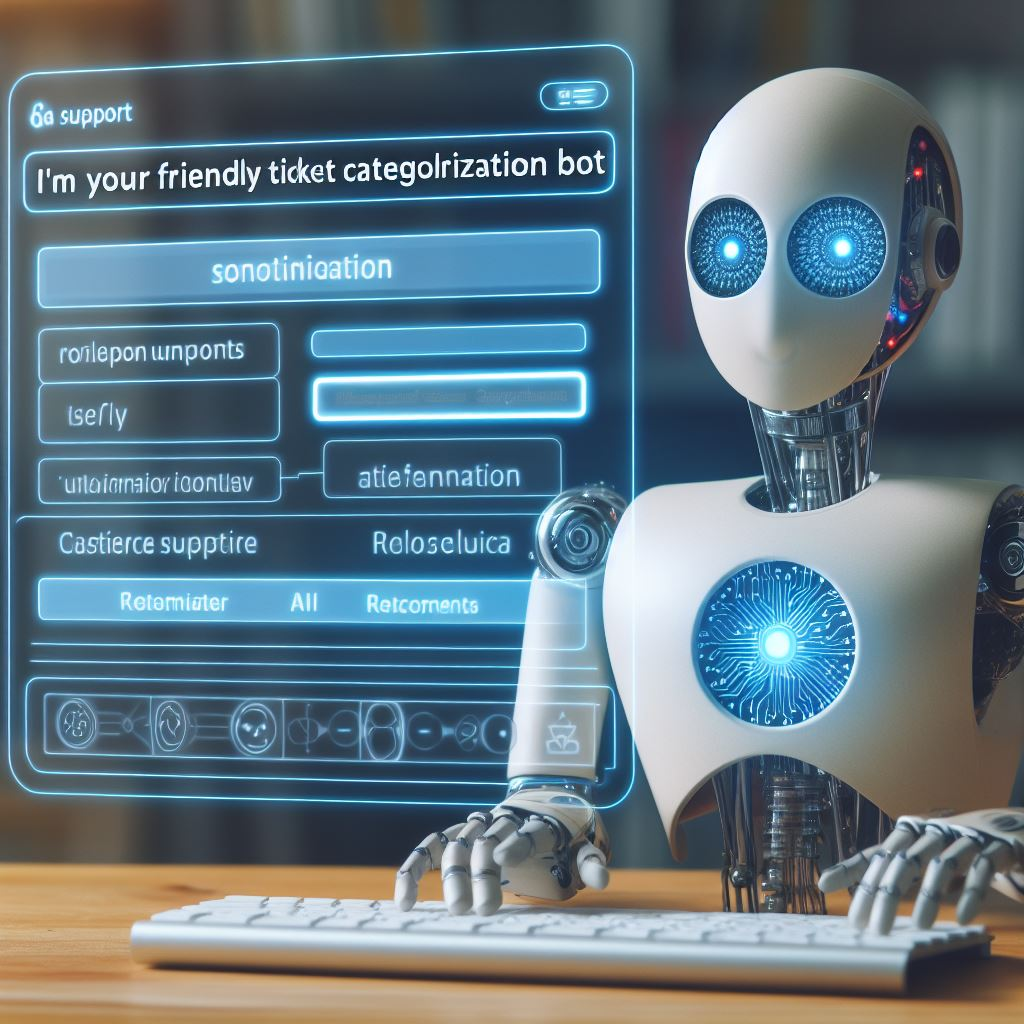

## **Problem Statement**

### Business Context

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships. As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously. One of the most effective strategies at your disposal is to harness the power of Support Ticket Categorization.


### Objective

Develop an advanced support ticket categorization system that accurately classifies incoming tickets, assigns relevant tags based on their content, implements mechanisms and generate the first response based on the sentiment for prioritizing tickets for prompt resolution.


## **Sample of Expected Output**

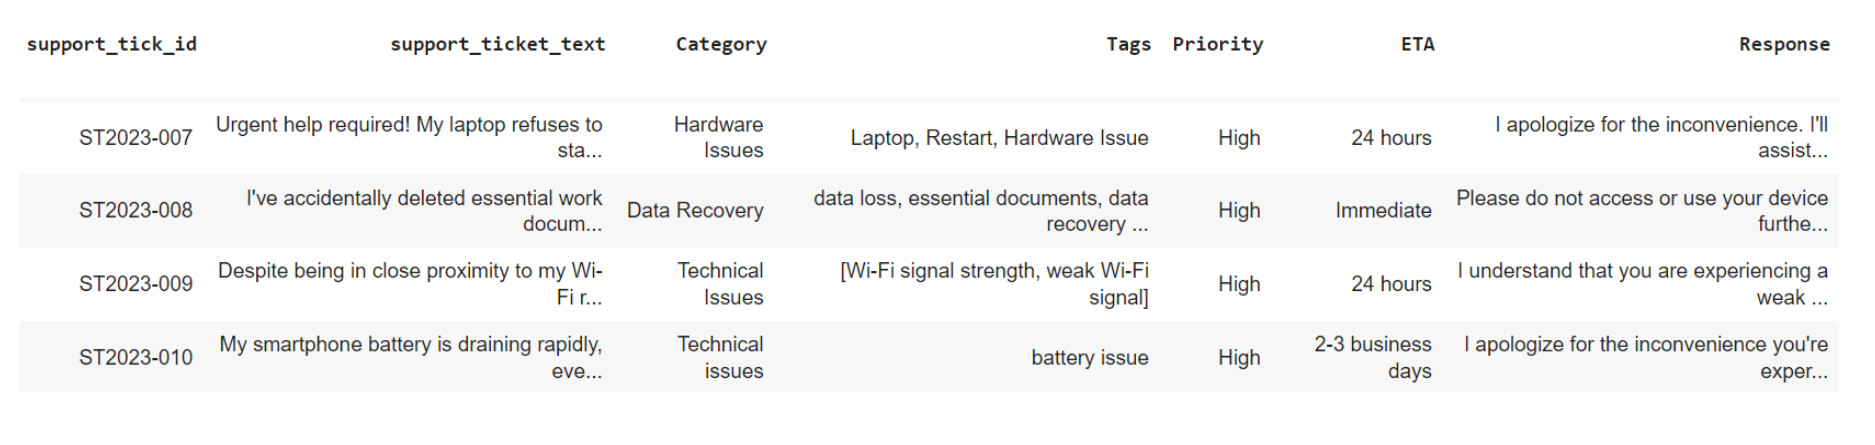

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.

* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.


**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

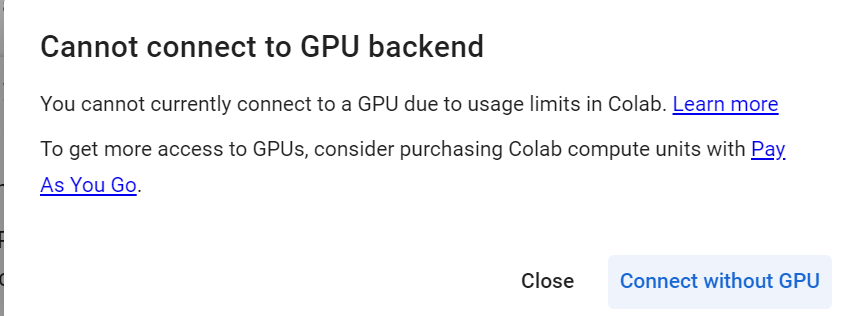

In [ ]:
import subprocess

In [ ]:
result = subprocess.run(['jupyter', 'nbconvert', '--to', 'html', '/content/drive/MyDrive/Support Ticket Categorizationnotebook_Html.ipynb'], capture_output=True)

In [ ]:
if result.returncode != 0:
    print(f"Error: {result.stderr.decode()}")

Error: [NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Support Ticket Categorizationnotebook_Html.ipynb' matched no files



In [ ]:
!pwd
!ls

/content
drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

In [ ]:
import logging
logging.getLogger('urllib3.connectionpool').setLevel(logging.WARNING)

## **Installing and Importing Necessary Libraries and Dependencies**

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used

!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

In [ ]:
# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used

#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

In [ ]:
#pip install huggingface-hub --upgrade

In [ ]:
#pip install pandas==2.0.3 huggingface-hub==0.21.2

**Note** : There may be an error related to a dependency issue thrown by the pip package. This can be ignored as it will not impact the execution of the code.

In [ ]:
# For downloading the models from HF Hub
#!pip install huggingface_hub==0.20.3 -q    ####---------------------NEW
!pip install huggingface_hub==0.20.3 pandas==2.0.3 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.19.0 requires huggingface-hub>=0.21.2, but you have huggingface-hub 0.20.3 which is incompatible.


In [ ]:
!pip install huggingface_hub datasets -q    ###### NEW -------------------------------------------------------

In [ ]:
!apt-get update
!apt-get install -y nvidia-cuda-toolkit

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

# for loading and manipulating data
import pandas as pd

# for time computations
import time

## **Loading the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Complete the code to read the CSV file.
data = pd.read_csv("/content/drive/MyDrive/Support_ticket_text_data_mid_term (1).csv")

## **Data Overview**

### Checking the first 5 rows of the data

In [ ]:
# Complete the code to check the first 5 rows of the data
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


### Checking the shape of the data

In [ ]:
# Complete the code to check the shape of the data
data.shape

(21, 2)

### Checking the missing values in the data

In [ ]:
# Complete the code to check for missing values in the data
data.isnull().sum()

support_tick_id        0
support_ticket_text    0
dtype: int64

## **Model Building**

### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
model_path = hf_hub_download(
    repo_id=model_name_or_path, # Complete the code to mention the repo_id
    filename=model_basename # Complete the code to mention the filename
)

In [ ]:
# uncomment and run the following code in case GPU is being used

# llm = Llama(
#     model_path=model_path,
#     n_ctx=1024, # Context window
#  )

In [ ]:
# uncomment and run the following code in case GPU is not being used

llm = Llama(
    model_path=model_path,
    n_ctx=1024, # Context window
    n_cores=-2 # Number of CPU cores to use
)

### Utility functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

## **Task 1: Ticket Categorization and Returning Structured Output**

In [ ]:
# creating a copy of the data
data_1 = data.copy()

In [ ]:
data_1.head()  #####---------------NEW

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [ ]:
#Defining the response funciton for Task 1.
def response_1(prompt,ticket):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      A:
      """,
      max_tokens=1024, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=0, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [ ]:
prompt_1 = """
    You are an AI customer service agent. Classify the support ticket based on the Support Ticket Text presented into the following categories and not any other.
    - Technical issues
    - Hardware issues
    - Data recovery
    Return only a structured JSON output in the following format:
    {"Category": "category_prediction"}
"""

**Note**: The output of the model should be in a structured format (JSON format).

In [ ]:
start = time.time()
data_1['model_response'] = data_1['support_ticket_text'].apply(lambda x: response_1(prompt_1, x))
end = time.time()

In [ ]:
print("Time taken ",(end-start))

Time taken  276.1012690067291


In [ ]:
#Code to check the first five rows of the data to confirm whether the new column has been added
data_1.head()  #####---------------NEW


,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{""Category"": ""Technical issues""}"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Category"": ""Hardware issues""}"
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Category"": ""Data recovery""}"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Category"": ""Technical issues""}"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Category"": ""Hardware issues""}"


In [ ]:
i = 2
print(data_1.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [ ]:
print(data_1.loc[i, 'model_response'])

{"Category": "Data recovery"}


In [ ]:
# applying the function to the model response
data_1['model_response_parsed'] = data_1['model_response'].apply(extract_json_data)
data_1['model_response_parsed'].head()

0    {'Category': 'Technical issues'}
1     {'Category': 'Hardware issues'}
2       {'Category': 'Data recovery'}
3    {'Category': 'Technical issues'}
4     {'Category': 'Hardware issues'}
Name: model_response_parsed, dtype: object

In [ ]:
data_1['model_response_parsed'].value_counts()

model_response_parsed
{'Category': 'Technical issues'}                  8
{'Category': 'Hardware issues'}                   6
{'Category': 'Data recovery'}                     6
{'Category': 'Hardware issues, Data recovery'}    1
Name: count, dtype: int64

In [ ]:
# Normalizing the model_response_parsed column
model_response_parsed_df_1 = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed_df_1.head()

,Category
0,Technical issues
1,Hardware issues
2,Data recovery
3,Technical issues
4,Hardware issues


In [ ]:
# Concatinating two dataframes
data_with_parsed_model_output_1 = pd.concat([data_1, model_response_parsed_df_1], axis=1)
data_with_parsed_model_output_1.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category
0,ST2023-006,My internet connection has significantly slowe...,"{""Category"": ""Technical issues""}",{'Category': 'Technical issues'},Technical issues
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Category"": ""Hardware issues""}",{'Category': 'Hardware issues'},Hardware issues
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Category"": ""Data recovery""}",{'Category': 'Data recovery'},Data recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Category"": ""Technical issues""}",{'Category': 'Technical issues'},Technical issues
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Category"": ""Hardware issues""}",{'Category': 'Hardware issues'},Hardware issues


In [ ]:
# Dropping model_response and model_response_parsed columns
final_data_1 = data_with_parsed_model_output_1.drop(['model_response','model_response_parsed'], axis=1)
final_data_1.head()

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,Technical issues
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware issues
2,ST2023-008,I've accidentally deleted essential work docum...,Data recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical issues
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware issues


## **Task 2: Creating Tags**

In [ ]:
# creating a copy of the data
data_2 = data.copy()

In [ ]:
def response_2(prompt,ticket,category):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      A:
      """,
      max_tokens=1024, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=0, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [ ]:
prompt_2 = """
    You are an AI customer service agent. Classify the support ticket based on the Support Ticket Text presented into the following categories and not any other.
    - Technical issues
    - Hardware issues
    - Data recovery Issues
    and classifying the tags associated with each category. For example issues are categorized as hardware issues and the tag should be laptop.

    Return only a structured JSON output in the following format:
    {"Tags": "tags_prediction"}
"""

**Note**: The output of the model should be in a structured format (JSON format).

In [ ]:
start = time.time()
data_2["model_response"]=final_data_1[['support_ticket_text','Category']].apply(lambda x: response_2(prompt_2, x[0],x[1]),axis =1)
end = time.time()

In [ ]:
print("Time taken ",end-start)

Time taken  292.96734404563904


In [ ]:
#Code to check the first five rows of the data to confirm whether the new column has been added
data_2.head()  #####---------------NEW


,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{""Tags"": ""internet, connectivity""}"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Tags"": ""laptop, hardware issue""}"
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Tags"": ""data_recovery""}"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Tags"": ""Wi-Fi, signal, weak, troubleshooting""}"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Tags"": ""smartphone, battery""}"


In [ ]:
i = 2
print(data_2.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [ ]:
print(data_2.loc[i, 'model_response'])

{"Tags": "data_recovery"}


In [ ]:
# Applying the function to the model response
data_2['model_response_parsed'] = data_2['model_response'].apply(extract_json_data)

In [ ]:
data_2["model_response_parsed"]

0                    {'Tags': 'internet, connectivity'}
1                    {'Tags': 'laptop, hardware issue'}
2                             {'Tags': 'data_recovery'}
3      {'Tags': 'Wi-Fi, signal, weak, troubleshooting'}
4                       {'Tags': 'smartphone, battery'}
5            {'Tags': 'online banking, password reset'}
6       {'Tags': 'performance, optimization, computer'}
7                 {'Tags': 'hardware, pc, blue_screen'}
8        {'Tags': 'external hard drive, data recovery'}
9              {'Tags': 'graphics card, gaming laptop'}
10                            {'Tags': 'data_recovery'}
11                        {'Tags': 'monitor, computer'}
12          {'Tags': 'laptop, hardware, data_recovery'}
13                 {'Tags': 'data_recovery, usb_drive'}
14                         {'Tags': 'laptop, touchpad'}
15             {'Tags': 'internet connection, network'}
16              {'Tags': 'Wi-Fi, router, connectivity'}
17                            {'Tags': 'data_rec

In [ ]:
# Normalizing the model_response_parsed column
model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_df_2.head()

,Tags
0,"internet, connectivity"
1,"laptop, hardware issue"
2,data_recovery
3,"Wi-Fi, signal, weak, troubleshooting"
4,"smartphone, battery"


In [ ]:
# Concatinating two dataframes
data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Tags
0,ST2023-006,My internet connection has significantly slowe...,"{""Tags"": ""internet, connectivity""}","{'Tags': 'internet, connectivity'}","internet, connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Tags"": ""laptop, hardware issue""}","{'Tags': 'laptop, hardware issue'}","laptop, hardware issue"
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Tags"": ""data_recovery""}",{'Tags': 'data_recovery'},data_recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Tags"": ""Wi-Fi, signal, weak, troubleshooting""}","{'Tags': 'Wi-Fi, signal, weak, troubleshooting'}","Wi-Fi, signal, weak, troubleshooting"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Tags"": ""smartphone, battery""}","{'Tags': 'smartphone, battery'}","smartphone, battery"


In [ ]:
# Dropping model_response and model_response_parsed columns
final_data_2 = data_with_parsed_model_output_2.drop(['model_response','model_response_parsed'], axis=1)
final_data_2.head()

,support_tick_id,support_ticket_text,Tags
0,ST2023-006,My internet connection has significantly slowe...,"internet, connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"laptop, hardware issue"
2,ST2023-008,I've accidentally deleted essential work docum...,data_recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"Wi-Fi, signal, weak, troubleshooting"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","smartphone, battery"


In [ ]:
# Checking the value counts of Category column
final_data_2['Tags'].value_counts()

Tags
data_recovery                                                                      3
external hard drive, data recovery                                                 2
laptop, hardware issue                                                             1
internet, connectivity                                                             1
smartphone, battery                                                                1
Wi-Fi, signal, weak, troubleshooting                                               1
online banking, password reset                                                     1
performance, optimization, computer                                                1
hardware, pc, blue_screen                                                          1
graphics card, gaming laptop                                                       1
monitor, computer                                                                  1
laptop, hardware, data_recovery                             

In [ ]:
final_data_2 = pd.concat([final_data_2,final_data_1["Category"]],axis=1)

In [ ]:
final_data_2 = final_data_2[["support_tick_id","support_ticket_text","Category","Tags"]]
final_data_2

,support_tick_id,support_ticket_text,Category,Tags
0,ST2023-006,My internet connection has significantly slowe...,Technical issues,"internet, connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware issues,"laptop, hardware issue"
2,ST2023-008,I've accidentally deleted essential work docum...,Data recovery,data_recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical issues,"Wi-Fi, signal, weak, troubleshooting"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware issues,"smartphone, battery"
5,ST2023-011,I'm locked out of my online banking account an...,Technical issues,"online banking, password reset"
6,ST2023-012,"My computer's performance is sluggish, severel...",Technical issues,"performance, optimization, computer"
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware issues,"hardware, pc, blue_screen"
8,ST2023-014,My external hard drive isn't being recognized ...,Data recovery,"external hard drive, data recovery"
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware issues,"graphics card, gaming laptop"


## **Task 3: Assigning Priority and ETA**

In [ ]:
# creating a copy of the data
data_3 = data.copy()

In [ ]:
def response_3(prompt,ticket,category,tags):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      Tags: {tags}
      A:
      """,
      max_tokens=1024,  #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=0.01, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [ ]:
prompt_3 = """
As a technical assistant, you receive a support ticket along with its category and tags. Your task is to analyze the ticket text, consider the category, tags, priority, and estimated time to resolution (ETA),
and then provide structured JSON output in the following format:

      - Priority of resolving the ticket
      - ETA for resolving the ticket

      Return only a structured JSON output in the following format:
      {"Priority": "priority_prediction", "ETA": "ETA_prediction"}
"""

**Note**: The output of the model should be in a structured format (JSON format).

In [ ]:
# Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_3['model_response'] = final_data_2[['support_ticket_text','Category','Tags']].apply(lambda x: response_3(prompt_3, x[0],x[1],x[2]),axis=1)
end = time.time()

In [ ]:
print("Time taken ",(end-start))

Time taken  359.3030438423157


In [ ]:
#Code to check the first five rows of the data to confirm whether the new column has been added
data_3.head()  #####---------------NEW


,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{""Priority"": ""High"", ""ETA"": ""Within 4 hours""}"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Priority"": ""High"", ""ETA"": ""Within 4 hours""}"
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Priority"": ""High"", ""ETA"": ""Within 24 hours""}"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Priority"": ""High"", ""ETA"": ""Within 24 hours""}"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Priority"": ""High"", ""ETA"": ""Within 24 hours""}"


In [ ]:
i = 2
print(data_3.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [ ]:
print(data_3.loc[i, 'model_response'])

{"Priority": "High", "ETA": "Within 24 hours"}


In [ ]:
# Applying the function to the model response
data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed'].head()

0     {'Priority': 'High', 'ETA': 'Within 4 hours'}
1     {'Priority': 'High', 'ETA': 'Within 4 hours'}
2    {'Priority': 'High', 'ETA': 'Within 24 hours'}
3    {'Priority': 'High', 'ETA': 'Within 24 hours'}
4    {'Priority': 'High', 'ETA': 'Within 24 hours'}
Name: model_response_parsed, dtype: object

In [ ]:
# Normalizing the model_response_parsed column
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3.head(21)

,Priority,ETA
0,High,Within 4 hours
1,High,Within 4 hours
2,High,Within 24 hours
3,High,Within 24 hours
4,High,Within 24 hours
5,High,1-2 hours
6,High,Within 24 hours
7,High,Within 2 business days
8,High,Within 24 hours
9,High,Within 2 business days


In [ ]:
# Concatinating two dataframes
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{""Priority"": ""High"", ""ETA"": ""Within 4 hours""}","{'Priority': 'High', 'ETA': 'Within 4 hours'}",High,Within 4 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Priority"": ""High"", ""ETA"": ""Within 4 hours""}","{'Priority': 'High', 'ETA': 'Within 4 hours'}",High,Within 4 hours
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Priority"": ""High"", ""ETA"": ""Within 24 hours""}","{'Priority': 'High', 'ETA': 'Within 24 hours'}",High,Within 24 hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Priority"": ""High"", ""ETA"": ""Within 24 hours""}","{'Priority': 'High', 'ETA': 'Within 24 hours'}",High,Within 24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Priority"": ""High"", ""ETA"": ""Within 24 hours""}","{'Priority': 'High', 'ETA': 'Within 24 hours'}",High,Within 24 hours


In [ ]:
# Dropping model_response and model_response_parsed columns
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

,support_tick_id,support_ticket_text,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,High,Within 4 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,High,Within 4 hours
2,ST2023-008,I've accidentally deleted essential work docum...,High,Within 24 hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,High,Within 24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",High,Within 24 hours


In [ ]:
final_data_3 = pd.concat([final_data_3,final_data_2[["Category","Tags"]]],axis=1)

In [ ]:
final_data_3.head()

,support_tick_id,support_ticket_text,Priority,ETA,Category,Tags
0,ST2023-006,My internet connection has significantly slowe...,High,Within 4 hours,Technical issues,"internet, connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,High,Within 4 hours,Hardware issues,"laptop, hardware issue"
2,ST2023-008,I've accidentally deleted essential work docum...,High,Within 24 hours,Data recovery,data_recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,High,Within 24 hours,Technical issues,"Wi-Fi, signal, weak, troubleshooting"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",High,Within 24 hours,Hardware issues,"smartphone, battery"


## **Task 4 - Creating a Draft Response**

In [ ]:
# creating a copy of the data
data_4 = data.copy()

In [ ]:
def response_4(prompt,ticket,category,tags,priority,eta):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category : {category}
      Tags : {tags}
      Priority: {priority}
      ETA: {eta}
      A:
      """,
      max_tokens=1024, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=0.01, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]


    return temp_output

In [ ]:
prompt_4 = """
    As an AI technical assistant, you receive a support ticket along with its category and tags. Your task is to analyze the ticket text, consider the category, tags, priority,
    and estimated time of arrival (ETA), and then draft a customer-friendly response.
    This response should address the customer's issue effectively and provide relevant information or instructions.

    Return only the response that has to be shared with the customer, no additional information should be present in the output.
"""

**Note** : For this task, we will not be using the *`extract_json_data`* function. Hence, the output from the model should be a plain string and not a JSON object.

In [ ]:
start = time.time()
data_4['model_response'] = final_data_3[['support_tick_id', 'support_ticket_text', 'Category', 'Tags',
       'Category', 'Tags']].apply(lambda x: response_4(prompt_4, x[0],x[1],x[2],x[3],x[4]),axis=1)
end = time.time()

In [ ]:
print("Time taken",(end-start))

Time taken 518.236424446106


In [ ]:
#Code to check the first five rows of the data to confirm whether the new column has been added
data_4.head()  #####---------------NEW


,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"Hello [Customer],"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"Dear Valued Customer,"
2,ST2023-008,I've accidentally deleted essential work docum...,We apologize for any inconvenience caused due...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"Hello [Customer],"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","Hello [Customer],"


In [ ]:
i = 2
print(data_4.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [ ]:
print(data_4.loc[i, 'model_response'])

 We apologize for any inconvenience caused due to your data loss incident. Our team will prioritize your data recovery request (ST2023-008) and will work diligently to recover your essential work documents. We understand the importance of your data and will keep you updated throughout the process. In the meantime, please avoid using your device to prevent any further data loss. Thank you for bringing this to our attention.


In [ ]:
final_data_4 = pd.concat([final_data_3,data_4["model_response"]],axis=1)

In [ ]:
final_data_4.rename(columns={"model_response":"Response"},inplace=True)

In [ ]:
final_data_4

,support_tick_id,support_ticket_text,Priority,ETA,Category,Tags,Response
0,ST2023-006,My internet connection has significantly slowe...,High,Within 4 hours,Technical issues,"internet, connectivity","Hello [Customer],"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,High,Within 4 hours,Hardware issues,"laptop, hardware issue","Dear Valued Customer,"
2,ST2023-008,I've accidentally deleted essential work docum...,High,Within 24 hours,Data recovery,data_recovery,We apologize for any inconvenience caused due...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,High,Within 24 hours,Technical issues,"Wi-Fi, signal, weak, troubleshooting","Hello [Customer],"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",High,Within 24 hours,Hardware issues,"smartphone, battery","Hello [Customer],"
5,ST2023-011,I'm locked out of my online banking account an...,High,1-2 hours,Technical issues,"online banking, password reset","Dear Valued Customer,"
6,ST2023-012,"My computer's performance is sluggish, severel...",High,Within 24 hours,Technical issues,"performance, optimization, computer","Hello [Customer],"
7,ST2023-013,I'm experiencing a recurring blue screen error...,High,Within 2 business days,Hardware issues,"hardware, pc, blue_screen","Hello [Customer],"
8,ST2023-014,My external hard drive isn't being recognized ...,High,Within 24 hours,Data recovery,"external hard drive, data recovery","Hello [Customer],"
9,ST2023-015,The graphics card in my gaming laptop seems to...,High,Within 2 business days,Hardware issues,"graphics card, gaming laptop","Hello [Customer],"


## **Model Output Analysis**

In [ ]:
# Creating a copy of the dataframe of task-4
final_data = final_data_4.copy()

In [ ]:
final_data["Category"].value_counts()    # complete the code with the column name for the column containing ticket categories

Category
Technical issues                  8
Hardware issues                   6
Data recovery                     6
Hardware issues, Data recovery    1
Name: count, dtype: int64

In [ ]:
final_data["Priority"].value_counts() # complete the code with the column name for the column containing the priorities of the ticket.

Priority
High    21
Name: count, dtype: int64

In [ ]:
final_data["ETA"].value_counts()# complete the code with the column name for the column containing ticket resolution ETA.

ETA
Within 24 hours                                                                  10
Within 4 hours                                                                    5
Within 2 business days                                                            3
1-2 hours                                                                         1
Within 24 hours for initial assessment, longer for data recovery if necessary     1
Within 2 hours                                                                    1
Name: count, dtype: int64

Let's dive in a bit deeper here.

In [ ]:
final_data.groupby(['Category', 'ETA']).support_tick_id.count() # complete the code to group by based on the categories and ETA.

Category                        ETA                                                                          
Data recovery                   Within 24 hours                                                                  6
Hardware issues                 Within 2 business days                                                           3
                                Within 24 hours                                                                  1
                                Within 4 hours                                                                   2
Hardware issues, Data recovery  Within 24 hours for initial assessment, longer for data recovery if necessary    1
Technical issues                1-2 hours                                                                        1
                                Within 2 hours                                                                   1
                                Within 24 hours                                      

## **Actionable Insights and Recommendations**

**Here are some actionable insights:**

**Objective:**

To improve customer experiences, drive growth, and build long-lasting relationships, it's a strategic imperative to stay attuned to the voice of your customers. This is not just a best practice; it's a necessity in today's dynamic business landscape. The goal is to implement an advanced support ticket categorization system to effectively manage customer experiences and expectations.

**Strategy:**

Harness the power of Support Ticket Categorization. Develop an advanced support ticket categorization system that accurately classifies incoming tickets, assigns relevant tags based on their content, implements mechanisms, and generates the first response based on the sentiment for prioritizing tickets for prompt resolution.

**Benefits:**

- **Improved customer experiences** through efficient and targeted support. Swift and effective responses to customer input foster enhanced customer experiences.
- **Increased growth** by resolving customer issues quickly and effectively. This serves as a catalyst for growth and prolonged customer engagement.
- **Nurtured lifetime value relationships** by building trust and loyalty. This is achieved by discerning the most pressing issues, setting priorities, and allocating resources judiciously.

**Implementation:**

- **Categorize support tickets:** Create a system to categorize support tickets based on their nature, urgency, and impact. Use a ticketing software or help desk system that allows for easy categorization.
- **Assign tickets to the right team:** Ensure that each category of support tickets is assigned to the appropriate team or individual. This ensures that customers receive the right support quickly.
- **Track and monitor ticket resolution:** Use the ticketing system to track the progress of each support ticket. Monitor key metrics such as average resolution time and customer satisfaction.
- **Continuously improve the system:** Regularly review the categorization system and make adjustments as needed. Gather feedback from customers and support staff to identify areas for improvement.




---







**Here are some actionable insights fron the `final_data` model output Analysis:**


---





1. **Technical issues** are the most common category with **8** instances. This suggests that resources should be allocated to address technical issues promptly.

2. **Hardware issues** and **Data recovery** both have **6** instances. These categories should also be prioritized.

3. **Data recovery**, all instances have an ETA of **Within 24 hours**. This indicates a consistent service level for this category.

4. **Hardware issues**, the ETA varies from **1-2 business days** to **Within 4 hours**. It might be beneficial to standardize the response time for this category to improve customer expectations and satisfaction.

5. **Technical issues** have the most varied ETA, ranging from **1-2 hours** to **Within 24 hours**. It might be helpful to investigate the reasons for this variation and see if response times can be optimized.

6. There is only **1** instance where both **Hardware issues** and **Data recovery** are involved. Given the complexity of such cases, it might be worth reviewing the process for these instances to ensure efficient handling.



<font size=6 color='blue'>Power Ahead</font>
___